<a href="https://colab.research.google.com/github/the-code-innovator/notebooks/blob/master/parkinsons_disease_replicated_acoustic_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson's Disease Classification with Replicated Acoustic Features

* The Dataset is a collection of acoustic features extracted from 3 samples of voice from 80 people of which 40 were tested positive for Parkinson's Disease.
- ```
80 persons
3 voice samples per person
80 * 3 = 240 samples in total
```

## **Abstract**
  - Contains acoustic features extracted from 3 voice recording replications of the sustained /a/ phonation for each one of the 80 subjects (40 tested positive).

## **Dataset Information**
  - **Data Set Characteristics**: Multivariate
  - **Number of Instances**: 240
  - **Area**: Life
  - **Number of Attributes**: 46
  - **Associated Tasks**: Classification
  - **Date Donated**: 10th April 2019

## **Dataset Links**
  - [dataset-csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00489/ReplicatedAcousticFeatures-ParkinsonDatabase.csv)
  - [dataset-description](https://archive.ics.uci.edu/ml/datasets/Parkinson+Dataset+with+replicated+acoustic+features+)

## **Information**
  1. Each row can not be used independently, because is one of the three replications of one individual. Nature of data is dependent for each subject, but independent from one to another subject. So, traditional technique from machine learning can not be applied to this dataset, because those techniques are based on the independent nature of the instances. There are 240 instances but for only 80 subjects, so they are not independent. Techniques as those presented in Naranjo et al. (2016), Naranjo et al. (2017) or other specifically designed can be used.
  2. The concept of replication considered here does not match the classical concept of statistical repeated measurements. The term 'replications' refers to the collection of features extracted from voice recordings belonging to the same subject. Since, in this context, features are extracted from multiple consecutive voice recordings from the same subject, in principle, the features should be identical. The imperfections in technology and the own biological variability result in non-identical replicated features that are more similar to one another than features from different subjects.
  3. All information about how the dataset was generated is presented in Naranjo et al. (2016).
  
## **Attribute Information**
  1. **ID**: Subjects's identifier.
  2. **Recording**: Number of the recording.
  3. **Status**: 0=Healthy; 1=PD
  4. **Gender**: 0=Man; 1=Woman
  5. Pitch local perturbation measures: relative jitter (**Jitter_rel**), absolute jitter (**Jitter_abs**), relative average perturbation (**Jitter_RAP**), and pitch perturbation quotient (**Jitter_PPQ**).
  6. Amplitude perturbation measures: local shimmer (**Shim_loc**), shimmer in dB (**Shim_dB**), 3-point amplitude perturbation quotient (**Shim_APQ3**), 5-point amplitude perturbation quotient (**Shim_APQ5**), and 11-point amplitude perturbation quotient (**Shim_APQ11**).
  7. Harmonic-to-noise ratio measures: harmonic-to-noise ratio in the frequency band 0-500 Hz (**HNR05**), in 0-1500 Hz (**HNR15**), in 0-2500 Hz (**HNR25**), in 0-3500 Hz (**HNR35**), and in 0-3800 Hz (**HNR38**).
  8. Mel frequency cepstral coefficient-based spectral measures of order 0 to 12 (**MFCC0, MFCC1,..., MFCC12**) and their derivatives (**Delta0, Delta1,..., Delta12**).
  9. Recurrence period density entropy (**RPDE**).
  10. Detrended fluctuation analysis (**DFA**).
  11. Pitch period entropy (**PPE**).
  12. Glottal-to-noise excitation ratio (**GNE**).

In [0]:
#@title Getting the Dataset from the [dataset-link](https://archive.ics.uci.edu/ml/machine-learning-databases/00489/ReplicatedAcousticFeatures-ParkinsonDatabase.csv).
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00489/ReplicatedAcousticFeatures-ParkinsonDatabase.csv

In [0]:
#@title Importing the Necessary Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
#@title Converting the csvdata to a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
dataset = pd.read_csv("ReplicatedAcousticFeatures-ParkinsonDatabase.csv")
dataset = dataset.drop('ID',axis=1)
x = dataset.drop('Status',axis=1,inplace=False)
y = dataset['Status']
dataset.head()

,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


Text(0.5, 1.0, 'Heat Map')

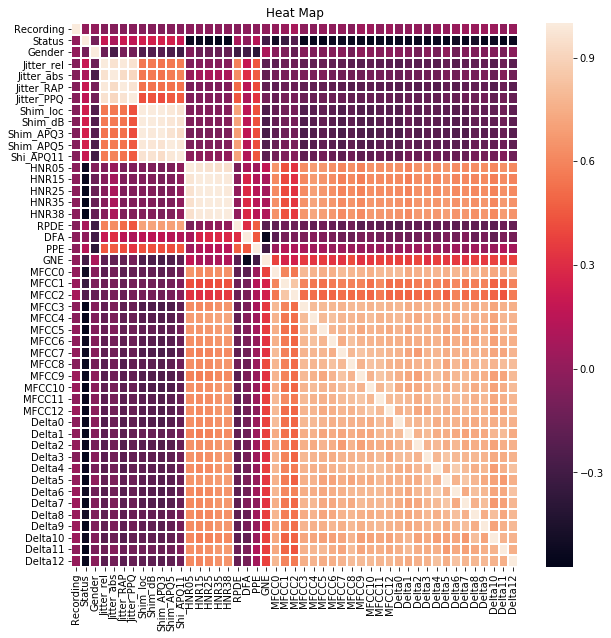

In [4]:
#@title Plotting a Correlation HeatMap for the Attributes in the Dataset.
%matplotlib inline
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(dataset.corr(),xticklabels=True, yticklabels=True,linewidths=1)
hm.set_title("Heat Map")

Text(0.5, 1.0, 'PCA')

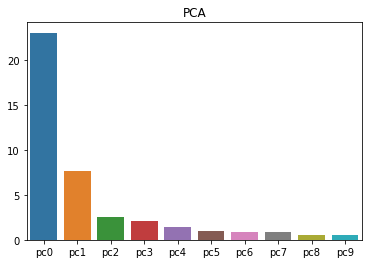

In [5]:
#@title Performing Principal Component Analysis for the given Dataset.
scaler=StandardScaler()
x = scaler.fit_transform(x)

components = 10
pca = PCA(n_components=components)
principalComponents = pca.fit_transform(x)
x = pd.DataFrame(data = principalComponents, columns = ["pc"+str(i) for i in range(components)])

ax = sns.barplot( x=["pc"+str(i) for i in range(components)],y=pca.explained_variance_)
ax.set_title("PCA")

In [0]:
#@title Performing Train Test Split with 80-20.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [7]:
#@title Random Forest Regression
rf = RandomForestRegressor(n_estimators = 1500, random_state = 42)
rf.fit(X_train, y_train)
y_pred = np.round(rf.predict(X_test))

macro = f1_score(y_test, y_pred, average='macro')
micro = f1_score(y_test, y_pred, average='micro')
weighted = f1_score(y_test, y_pred, average='weighted')
print("Micro: ", micro)
print("Macro: ", macro)
print("Weighted: ", weighted)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Micro:  0.8541666666666666
Macro:  0.8541033434650456
Weighted:  0.8541033434650457
Accuracy:  0.8541666666666666


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

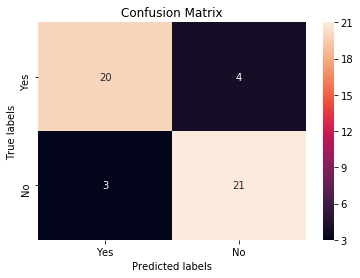

In [8]:
#@title Confusion Matrix for the Random Forest Regressor.
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_title("Random Forest CF")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Yes', 'No'])

Accuracy of the Model used: **0.854167**

***~ 85.42% accuracy***